****Using Python to get the Information Ratio****

In [3]:
import pandas as pd
import yfinance as yf

The information ratio helps measure the performance of active money managers. The higher the information ratio, the better the skill. Many hedge funds use this ratio as a metric for calculating a performance fee.

We will:
1. Get stock price data
2. Construct a simple portfolio
3. Compute the information ratio
4. Compare our portfolio to the benchmark ($QQQ)

In [4]:
data = yf.download(["QQQ", "AAPL", "AMZN"], start="2020-01-01", end="2022-07-31")

closes = data['Adj Close']
benchmark_returns = closes.QQQ.pct_change().dropna()

[*********************100%***********************]  3 of 3 completed


In [5]:
#construct a sample portfolio of equal shares
aapl_position = closes.AAPL * 50
amzn_position = closes.AMZN * 50

#compute the portfolio value over time
portfolio_value = aapl_position + amzn_position

#compute the portoflio daily pnl
portfolio_pnl = ((aapl_position - aapl_position.shift()) + (amzn_position - amzn_position.shift()))

#compute the portfolio daily return
portfolio_returns = (portfolio_pnl / portfolio_value)
portfolio_returns.name = "Port"

<AxesSubplot:xlabel='Date'>

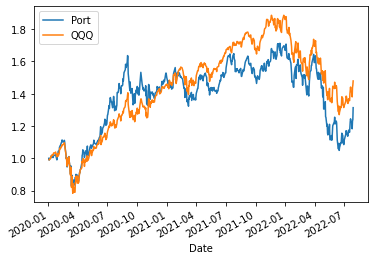

In [6]:
#plot the cumulative portfolio vs. benchmark returns
portfolio_cumulative_returns = (portfolio_returns.fillna(0.0) + 1).cumprod()
benchmark_cumulative_returns = (benchmark_returns.fillna(0.0) + 1).cumprod()

pd.concat([portfolio_cumulative_returns, benchmark_cumulative_returns], axis=1).plot()

In [7]:
def information_ratio(portfolio_returns, benchmark_returns):
    """ Determines the information ratio of a strategy.
    
    Parameters
    ----------
    portfolio_returns : pd.Series and np.ndarray
            Daily returns of the strategy, noncumulative.
    benchmark_returns : int, float
            Daily returns of the benchmark or factor, noncumulative.
            
    Returns
    -------
    information_ratio : float
    
    Note
    ----
    See: https://en.wikipedia.org/wiki/Information_ratio for more details.
    """
    active_return = portfolio_returns - benchmark_returns
    tracking_error = active_return.std()
    
    return active_return.mean() / tracking_error

In [8]:
#compare the portfolio results to the benchmark
information_ratio(portfolio_returns, benchmark_returns)

-0.014568116550204492

The information ratio is negative. With a $QQQ expense ratio of 0.2%, our portfolio is not outperforming QQQ and it’s more expensive to manage. We might consider investing in QQQ instead.